# Introduction
**ARIMA** stands for *AutoRegressive Integrated Moving Average*, and it is a widely used time series forecasting model. ARIMA is designed to capture and represent the temporal dependencies and patterns in a time series data set to make accurate predictions about future values. <br><br>

*Components of ARIMA: <br>*
1. **Autoregressive (AR) component** <br>
This component represents the relationship between the current value of the time series and its previous values. It assumes that the current value can be explained by a linear combination of its past values. <br>

2. **Integrated (I) Compenent** <br>
This component represents the number of differencing operations required to make the time series stationary. Stationarity means that the statistical properties of the time series, such as mean and variance, remain constant over time. Differencing involves taking the difference between consecutive observations to remove any trend or seasonality in the data. <br>

3. **Moving Average (MA) Component** <br>
This component represents the relationship between the current value of the time series and the residual errors from the past values. It assumes that the current value can be explained by a linear combination of past residual errors.<br><br>

The notation used to describe an ARIMA model is ARIMA(p, d, q), where: <br><br>

- *'p'* is the order of the AutoRegressive component (number of past lags considered).<br>
- *'d'* is the degree of differencing required to make the time series stationary.<br>
- *'q'* is the order of the Moving Average component (number of past error terms considered).<br>

The ARIMA model is generally employed for univariate time series data, where only one variable's values are observed over time.

## Shampoo Sales Time Series modeling using ARIMA

**Dataset Description** <br>
The dataset describes the monthly number of sales of shampoo over a 3year period.

In [186]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [187]:
#Loading Dataset
df = pd.read_csv('Datasets/shampoo.csv')

In [188]:
df.head()

,Month,Sales
0,2000-01-01,266.0
1,2000-01-02,145.9
2,2000-01-03,183.1
3,2000-01-04,119.3
4,2000-01-05,180.3


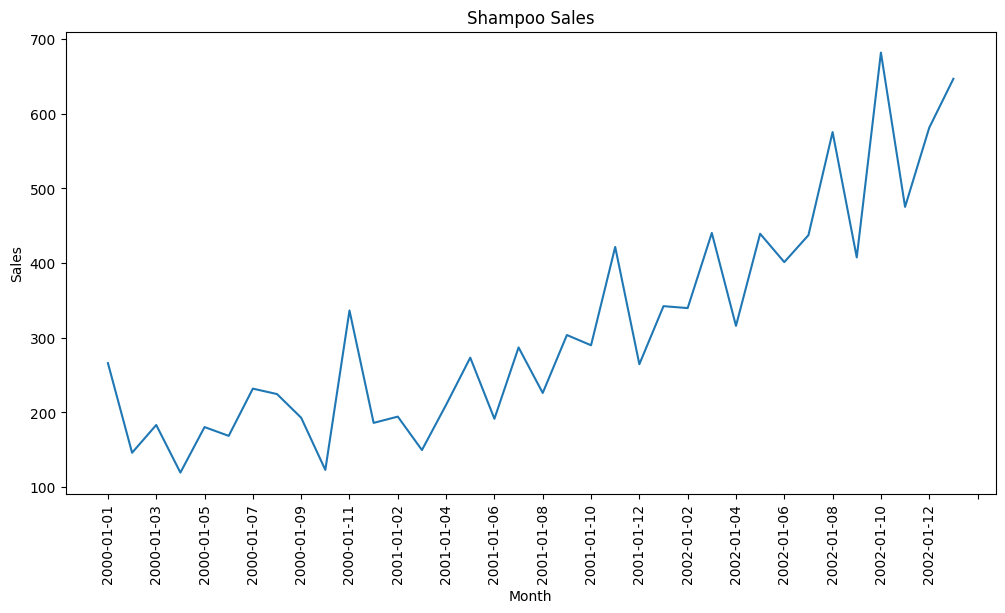

In [189]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Sales'])
#Graph Title
plt.title('Shampoo Sales')

#Naming the axis
plt.xlabel ('Month')
plt.ylabel ('Sales')



# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)
# Use MaxNLocator to reduce the number of xticks
from matplotlib.ticker import MaxNLocator
locator = MaxNLocator(nbins=20)
plt.gca().xaxis.set_major_locator(locator)


plt.show()

**Observation** <br>
The Shampoo sales dataset has a clear trend. This suggesrs that the time series is not sationary and will require differencing to make it stationary.

In [190]:
df.head()

,Month,Sales
0,2000-01-01,266.0
1,2000-01-02,145.9
2,2000-01-03,183.1
3,2000-01-04,119.3
4,2000-01-05,180.3


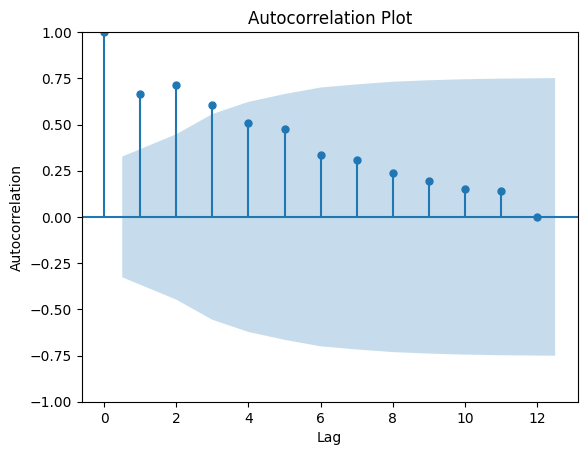

In [191]:
#Autocorrection plot of the time series
from statsmodels.graphics.tsaplots import plot_acf

# Set 'Date' as the index
df.set_index('Month', inplace=True)

# Calculate the ACF (via statsmodels)
plot_acf(df['Sales'], lags=12)

# Show the plot
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

**Explanation** <br>
- **statsmodels.graphics.tsaplots.plot_acf**: A function from statsmodels library for plotting the autocorrelation function. <br>
- **plot_acf** function takes the 'Sales'column as input and calculates the autocorrelation values at different lags (up to 12 lags). It then plots these autocorrelation values using a barchart.

### ARIMA

**Steps in building an ARIMA model** <br>
1. Visualize the time series and understand its characteristics.<br>
2. Check for the stationary in the data.<br>
3. Identify the order of differencing required to make the data stationary.<br>
4. Plot the autocorrelation and partial autocorrelation functions to determine the orders of the AR and MA components.<br>
5. Build the ARIMA model.<br>
6. Evaluate the model's performance.<br>

In [192]:
#Importing the libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

### Step 1: Visualize the time series data

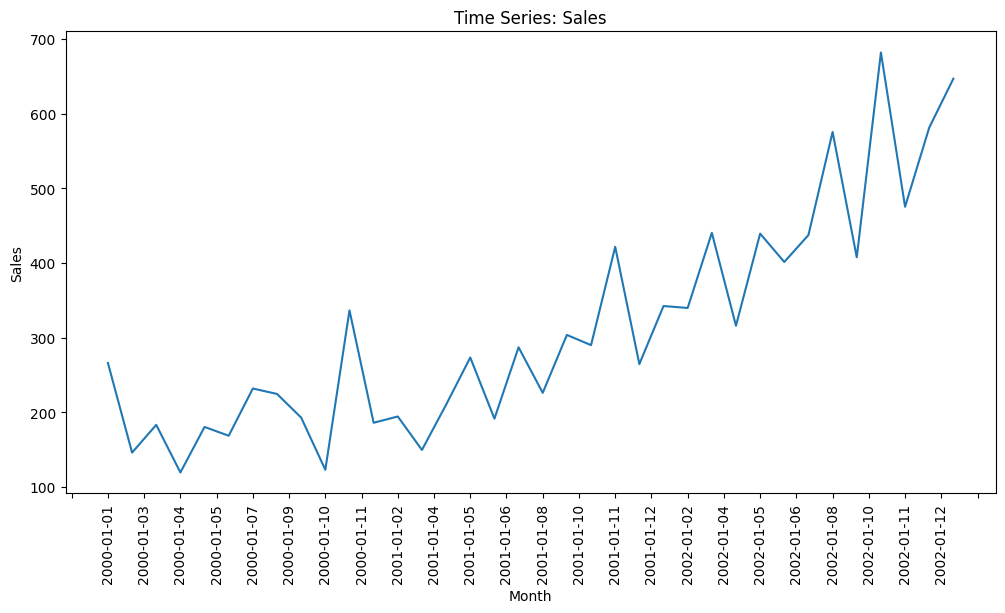

In [193]:
#STEP1 :VISUALIZE THE TIME SERIES DATA

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Time Series: Sales')

#Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Use MaxNLocator to reduce the number of xticks
from matplotlib.ticker import MaxNLocator
locator = MaxNLocator(nbins=30)
plt.gca().xaxis.set_major_locator(locator)

plt.show()

### Step 2 & 3: Check for the stationary in the data.

In [194]:
# Check for stationarity
result = adfuller(df['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 3.0601420836411815
p-value: 1.0
Critical Values:
   1%: -3.7238633119999998
   5%: -2.98648896
   10%: -2.6328004


**Explanation** <br>
We performed the Augmented Dickey-Fuller(ADF) test on the Sales column of the dataframe to check for stationarity.<br>
- **ADF Statistic** : a numerical value that is part of the test. <br>
- **P-value** : the probabilty of obtaining the ADF statistic assumming that the null hypothesis is true (the data is non-stationary). A lower p-value indicates stronger evidence against the null hypothesis, suggesting that the data is stationary.<br>
- **Critical Values** : these are the test statistic values at different significance levels (1%, 5% and 10%).<br>
The ADF statistic is compared with the critical values to determine the stationarity of the time series. If the ADF Statistic is less than the critical calue at a certain significance level, we can reject the null hypothesis and conclude that the data is stationary at that level of significance.<br>
If the p-value is less than the critical calues, it suggestts that the data is stationary, and differencing may not be necessary. Otherwise, differencingmay be required to make the data stationary before building an ARIMA model.


### Step 4: Plot the autocorrelation and partial autocorrelation functions to determine the orders of the AR and MA components.

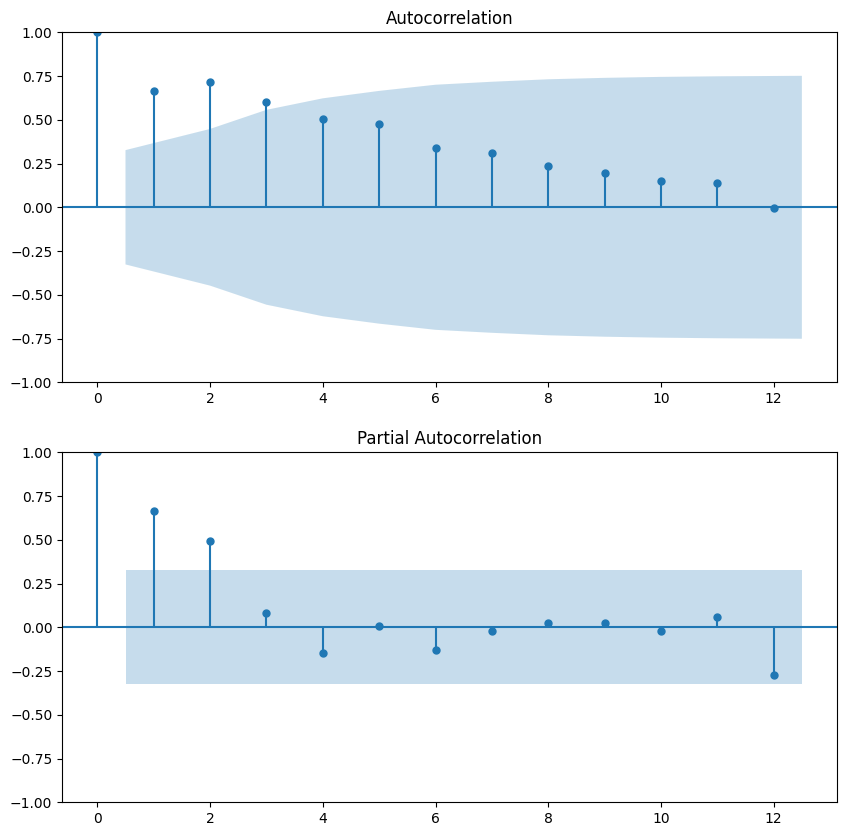

In [195]:
# Plot autocorrelation and partial autocorrelation functions
plt.figure(figsize=(10, 10))
plt.subplot(211)
plot_acf(df['Sales'], lags=12, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Sales'], lags=12, ax=plt.gca())
plt.show()

**Explanation** <br>
We plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function(ACF) for the Sales column of the dataframe. These plots are essential in identifying the orders of the Autoregressive (AR) and Moving Average(MA) components for the arima model. <br>
- **plt.subplot(211)** : sets up a grid for two plots in a 2-row, 1 column configuration. The first plot (upper plot) will be the ACF plot.<br>
- **ax=plt.gca()** : argument ensures that the plot is genereated in the current subplot.<br>
- **plt.subplot(212)** : sets p tthe second plot in the 2-row, 1 column grid configuration.

### Step 5:ARIMA Model

In [196]:
# ARIMA Model
order = (1, 0, 1)  # (p, d, q) - Adjust these values based on the ACF and PACF plots
model = ARIMA(df['Sales'], order=order)
results = model.fit()


c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Explanation** <br>
An ARIMA model is built using the 'Sales' column of the DataFrame (df['Sales']). The ARIMA model is specified with the order (p, d, q) set to (1, 0, 1). <br>
The *order* variable represents the order of the ARIMA model where (p,d,f) specifies the numer of autoregressive(AR) terms, differences(d) and Moving Average(MA) terms respectively.

In [197]:
# Summary of the ARIMA model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -211.054
Date:                Wed, 19 Jul 2023   AIC                            430.108
Time:                        13:00:58   BIC                            436.442
Sample:                             0   HQIC                           432.319
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.7012    234.967      1.586      0.113     -87.826     833.228
ar.L1          0.9802      0.044     22.343      0.000       0.894       1.066
ma.L1         -0.5855      0.217     -2.695      0.0

The summary provides a comprehensive overview of the model's performance and statistical measures.<br>
- **Coefficients**: Estimated coefficients for the AR, MA, and constant terms in the ARIMA model.<br>
- **Standard Errors**: Standard errors associated with the estimated coefficients.<br>
- **t-values**: t-values (or z-values) for the coefficients, used to test the significance of each coefficient.<br>
- **P-values**: P-values for the t-tests, indicating the statistical significance of each coefficient.<br>
- **Log-Likelihood**: The log-likelihood value of the model, which helps assess the goodness-of-fit.<br>
- **AIC and BIC**: Information criteria used to compare different models and select the best-fitting one.<br>
- **Ljung-Box (Q) statistic**: A test for the absence of serial correlation in the model residuals.<br>
- **Durbin-Watson statistic**: A test for autocorrelation in the residuals. <br>

In [198]:
# Forecast
forecast_steps = 12
forecast = results.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Sales:")
print(forecast)

Forecasted Sales:
36    576.150014
37    572.126186
38    568.181942
39    564.315708
40    560.525940
41    556.811127
42    553.169785
43    549.600463
44    546.101734
45    542.672204
46    539.310503
47    536.015291
Name: predicted_mean, dtype: float64


c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**Explanation** <br>
We perform a forecast using the ARIMA model(results) and print the forecasted values for the next 12 steps(months)

## Definition of terms

- ### AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)
Information criteria for model selection in statistical modelling, including ARIMA models. They provide a way to balance model goodness-of-fit with model complexity, helping to identify the most appropriate model for a given dataset.

- ### Ljung-Box (Q) statistic
It is a test used in TSA to check for the presence of autocorrelation in the residuls of a fitted model. It is a common diagostic tool to assess whether a model adequately captures the serial correlation in the data.<br>

*Here's a more detailed explanation of the Ljung-Box Q statistic:*<br>
1. **Residual Autocorrelation** <br>
After fitting a time series model (e.g., ARIMA, SARIMA), the residuals are obtained by subtracting the fitted values from the actual values in the dataset. The residuals represent the unexplained variability in the data after accounting for the model's fitted values.<br>

2. **Autocorrelation Function of Residuals** <br>
The autocorrelation function (ACF) of the residuals is computed to investigate whether there is any remaining serial correlation in the model's residuals. The ACF shows how each lag of the residuals is correlated with the previous lags.<br>

3. **Ljung-Box Test** <br>
The Ljung-Box Q statistic is a statistical test used to determine whether the autocorrelation coefficients in the ACF of the residuals are significantly different from zero. It helps assess whether the residuals are independently and identically distributed (IID) noise, which is a desirable property for a well-fitted model.<br>

4. **Hypotheses of the Test** <br>

*Null Hypothesis (H0)*: The residuals are independently distributed (i.e., no autocorrelation).<br>
*Alternative Hypothesis (H1)*: The residuals exhibit autocorrelation up to a certain lag.<br>

**Interpreting the Test** <br>
If the calculated Q statistic exceeds the critical value at a chosen significance level (e.g., 0.05), we reject the null hypothesis of no autocorrelation. This indicates that the residuals do exhibit significant autocorrelation, suggesting that the model may not be capturing all the underlying patterns in the data. In such cases, further investigation and model refinement may be necessary.<br>

- ### Durbin-Watson statistic
The Durbin-Watson statistic is a test used in time series analysis and regression analysis to check for the presence of autocorrelation in the residuals of a model. It is particularly useful in linear regression models and time series models, such as ARIMA and SARIMA, where serial correlation can affect the reliability of the parameter estimates and predictions.<br>

*Here's a more detailed explanation of the Durbin-Watson statistic*: <br>

1. **Residual Autocorrelation** <br>
After fitting a model (e.g., linear regression, ARIMA) to the data, the residuals are obtained by subtracting the fitted values from the actual values. The residuals represent the unexplained variability in the data after accounting for the model's predictions.<br>

2. **Autocorrelation of Residuals**<br>
The Durbin-Watson statistic assesses whether the residuals are autocorrelated, meaning that the residuals at one time point are correlated with the residuals at nearby time points (lags). Autocorrelation in residuals indicates that the model might not adequately capture the temporal patterns in the data.<br>

3. **Hypotheses of the Test** <br>

*Null Hypothesis (H0)*: There is no first-order autocorrelation in the residuals (i.e., the residuals are uncorrelated).<br>
*Alternative Hypothesis (H1)*: There is first-order autocorrelation in the residuals.<br>

**Interpreting the Test** <br>

- *DW near 2*: Indicates no first-order autocorrelation (residuals are uncorrelated).<br>
- *DW < 2*: Suggests positive autocorrelation (positive serial correlation) in the residuals.<br>
- *DW > 2*: Suggests negative autocorrelation (negative serial correlation) in the residuals.<br>